In [1]:
from cgeniepy.model import GenieModel
import xarray as xr
import numpy as np
from cgeniepy.array import GriddedData
GriddedData.modify_in_place=False
## plot pft richness maps
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cmap import Colormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

exp3 = GenieModel("../model/muffin.u067bc.PO4.EXP3/", gemflag=['biogem'])
exp1 = GenieModel("../model/muffin.u067bc.PO4.EXP1/", gemflag=['biogem'])
exp2 = GenieModel("../model/muffin.u067bc.PO4.EXP2/", gemflag=['biogem'])

In [2]:
d13C_exp3 = exp3.get_ts("ocn_DIC_13C")
d13C_exp1 = exp1.get_ts("ocn_DIC_13C")
d13C_exp2 = exp2.get_ts("ocn_DIC_13C")

for d13C in [d13C_exp1, d13C_exp2, d13C_exp3]:
    d13C['gradient'] = d13C['surface (ice-free) DIC_13C (o/oo)'] -d13C['benthic [> 2000 m] DIC_13C (o/oo)']

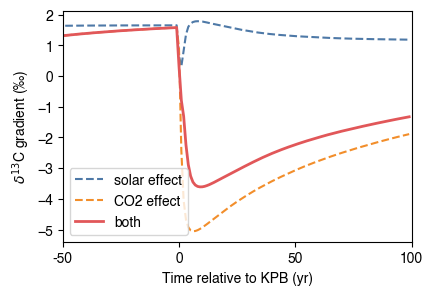

In [7]:
## plot in one figure
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

from cmap import Colormap
cmap = Colormap("seaborn:tab10_new").to_mpl()

fig, ax = plt.subplots(1, 1, figsize=(4.5,3))
d13C_exp1['gradient'].plot(ax=ax, label='solar effect', linestyle='--', color=cmap.colors[0])
d13C_exp2['gradient'].plot(ax=ax, label='CO2 effect', linestyle='--', color=cmap.colors[1])
d13C_exp3['gradient'].plot(ax=ax, label='both',linewidth=2, color=cmap.colors[2])
ax.legend()

## change time ticks, 0,200 to -100,100
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(-100,101,50))
ax.set_xlim(50,200)
ax.set_ylabel(r"$\delta^{13}$C gradient (‰)")
ax.set_xlabel("Time relative to KPB (yr)")
fig.savefig('../output/d13C_gradient.png', dpi=300, bbox_inches='tight')